## Dataset Description:

Use the Glass dataset and apply the Random forest model.

## 1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.


In [1]:
import pandas as pd
import numpy as np

In [20]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [21]:
df = pd.read_csv("glass.csv")

In [22]:
print("First 5 rows of dataset:")
display(df.head())


First 5 rows of dataset:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [23]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [24]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution (Type column):")
print(df['Type'].value_counts())


Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Class distribution (Type column):
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


#

## 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


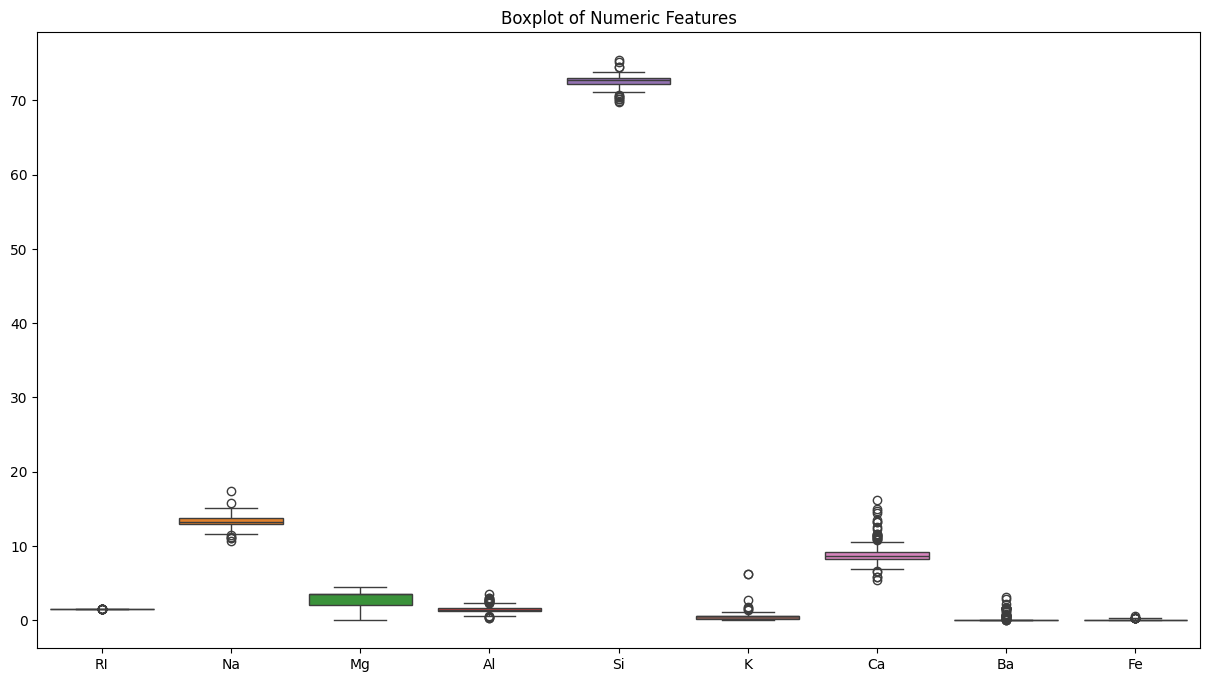

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots to detect outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title("Boxplot of Numeric Features")
plt.show()

#### Observation:
- Features like Na, Ca may have outliers
- Outliers can affect some models (Random Forest is robust to them)


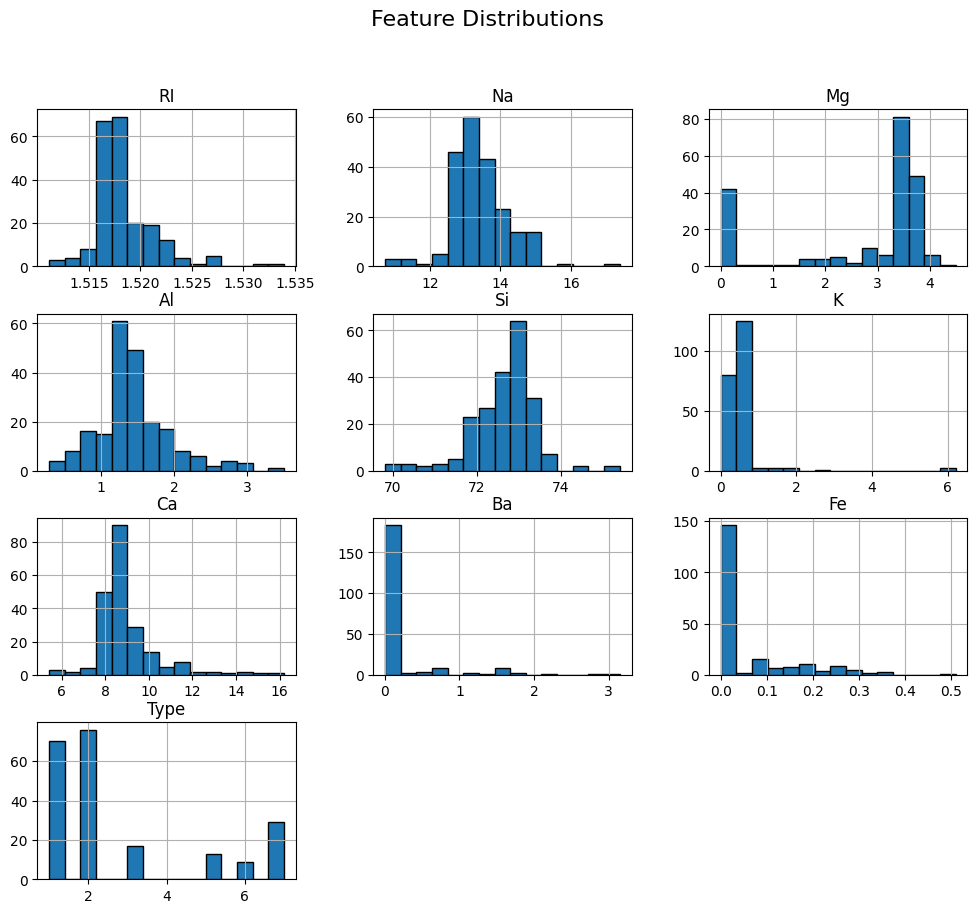

In [27]:
# 1️ Histograms for all numeric features
df.hist(figsize=(12,10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


#### Observation:
- See which features are skewed or normally distributed
- Example: Mg or Na might be skewed


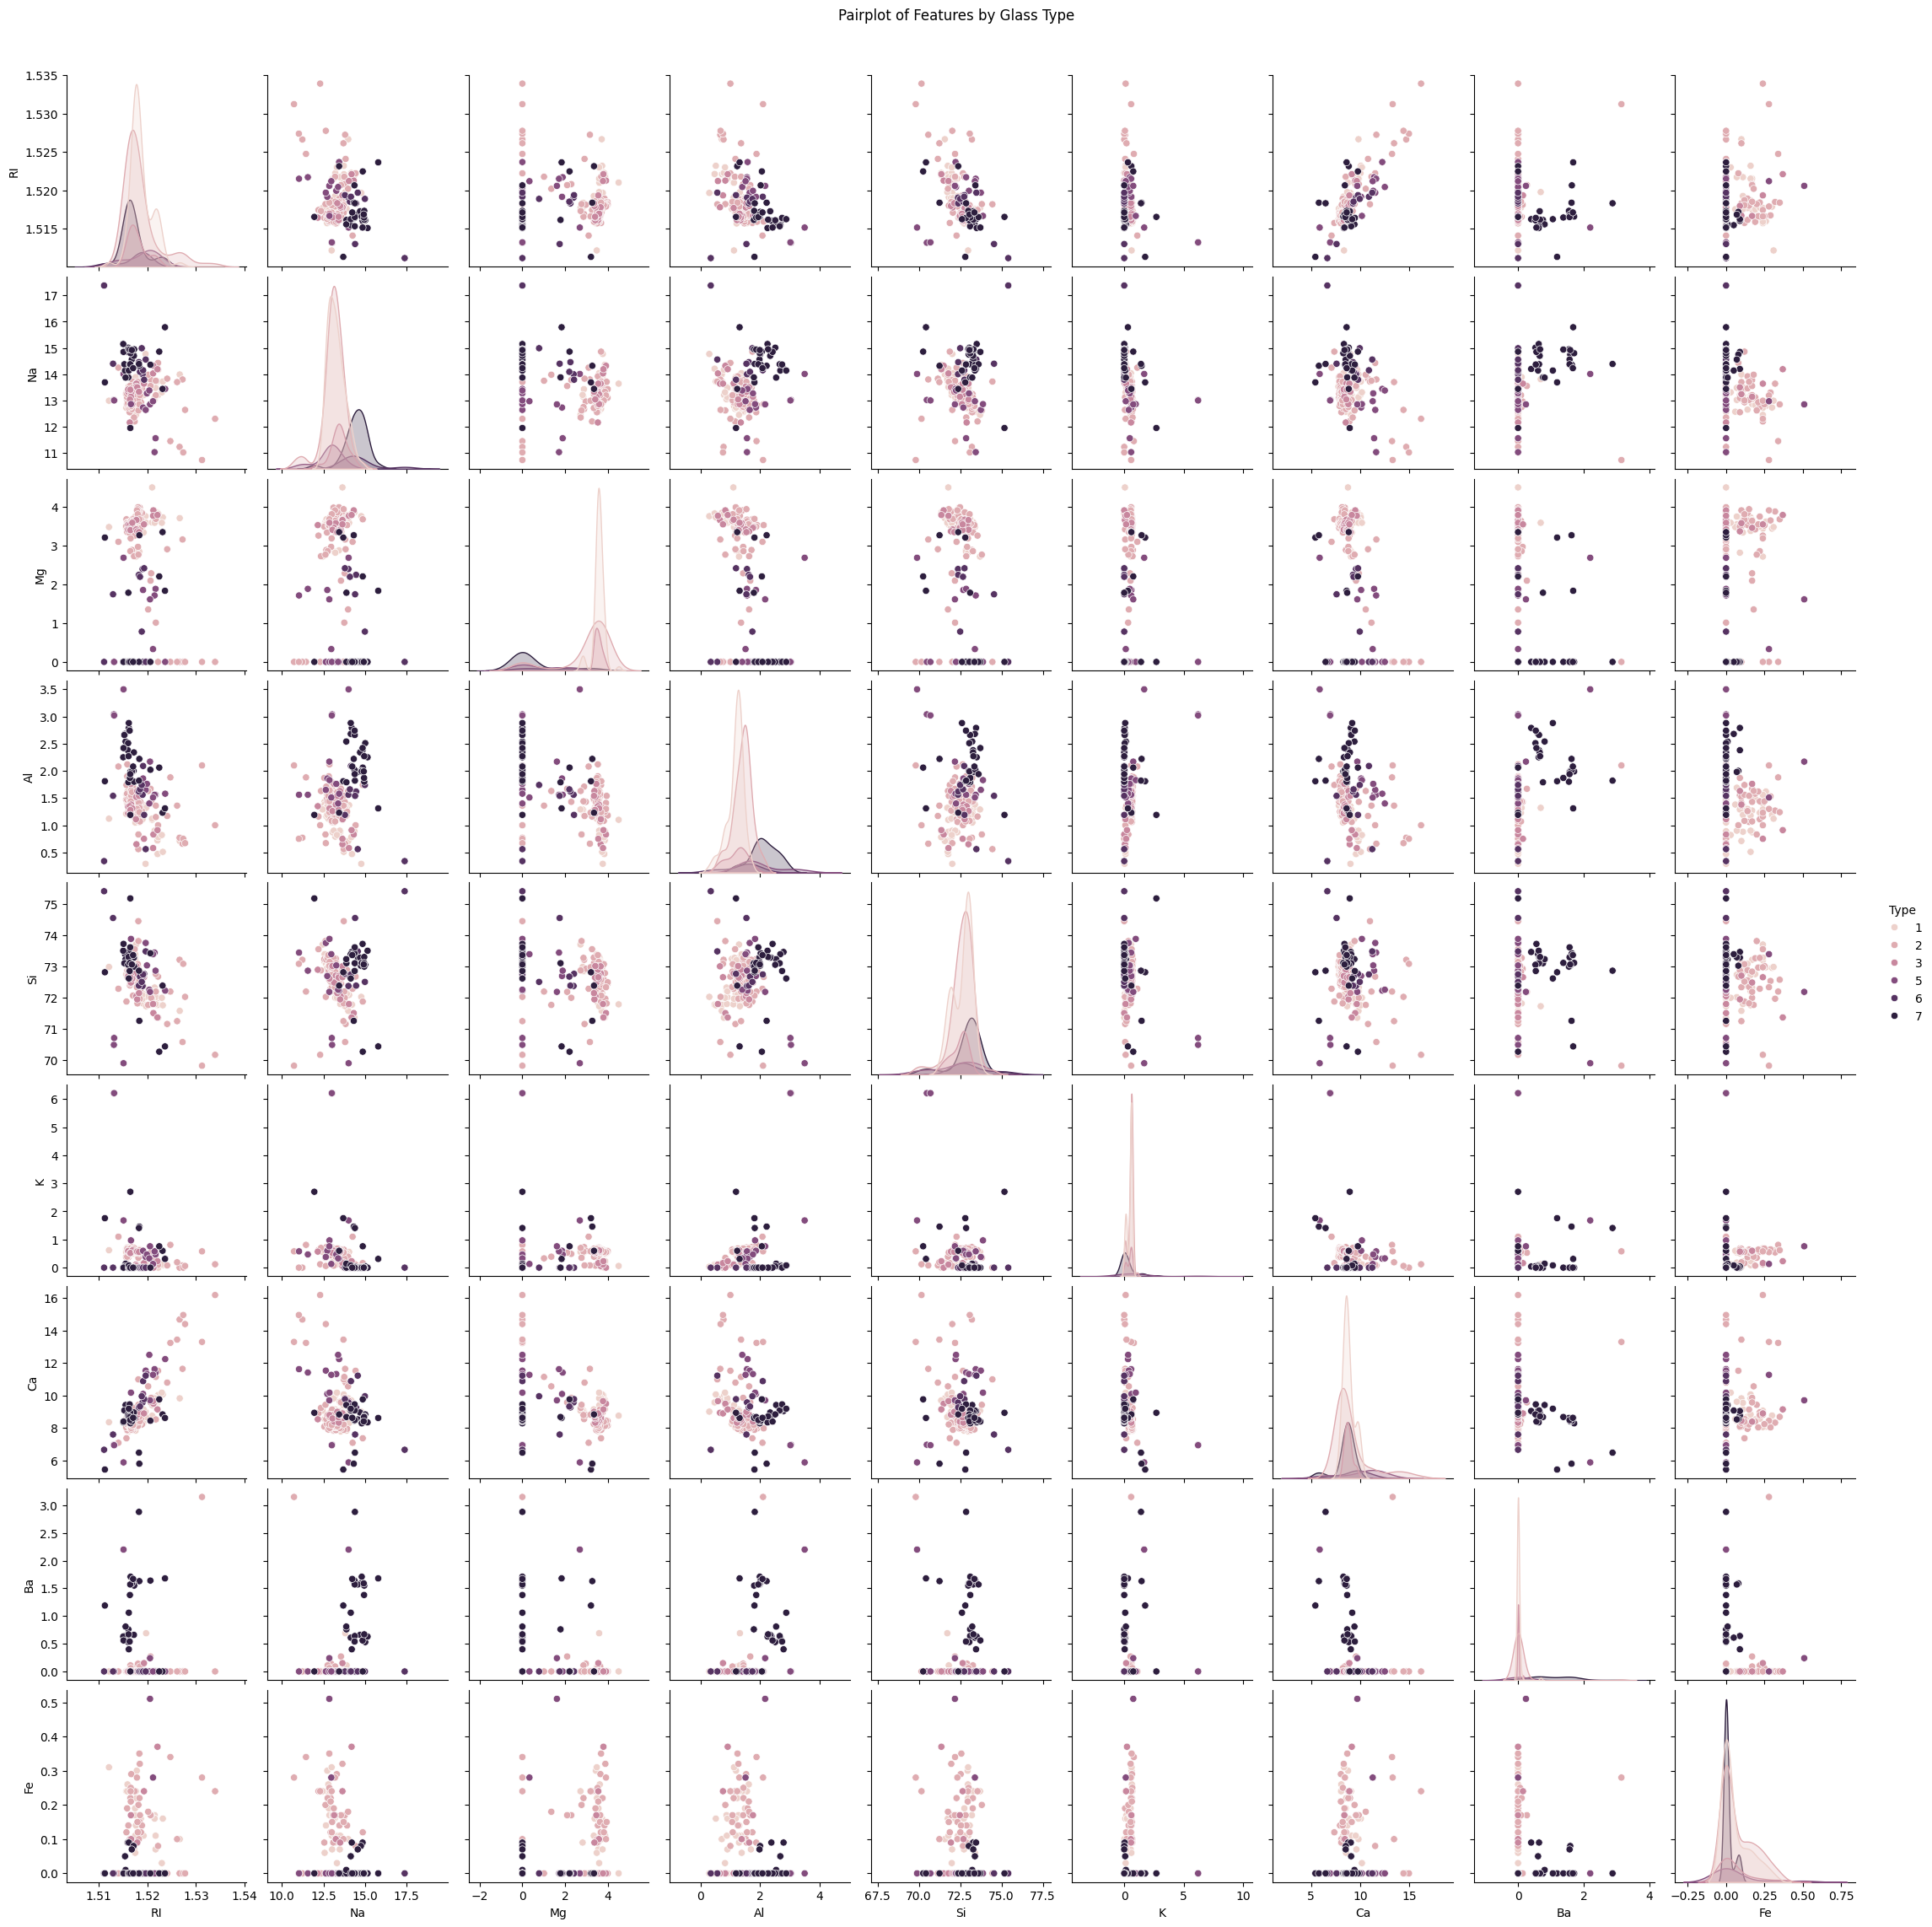

In [28]:
# 3️ Pairplot to visualize relationships between features
sns.pairplot(df, hue="Type", diag_kind='kde')
plt.suptitle("Pairplot of Features by Glass Type", y=1.02)
plt.show()


#### Observation:
- Look for separation of classes in feature space
- Some pairs like Ca vs Na or Mg vs Al may show clusters for different glass types

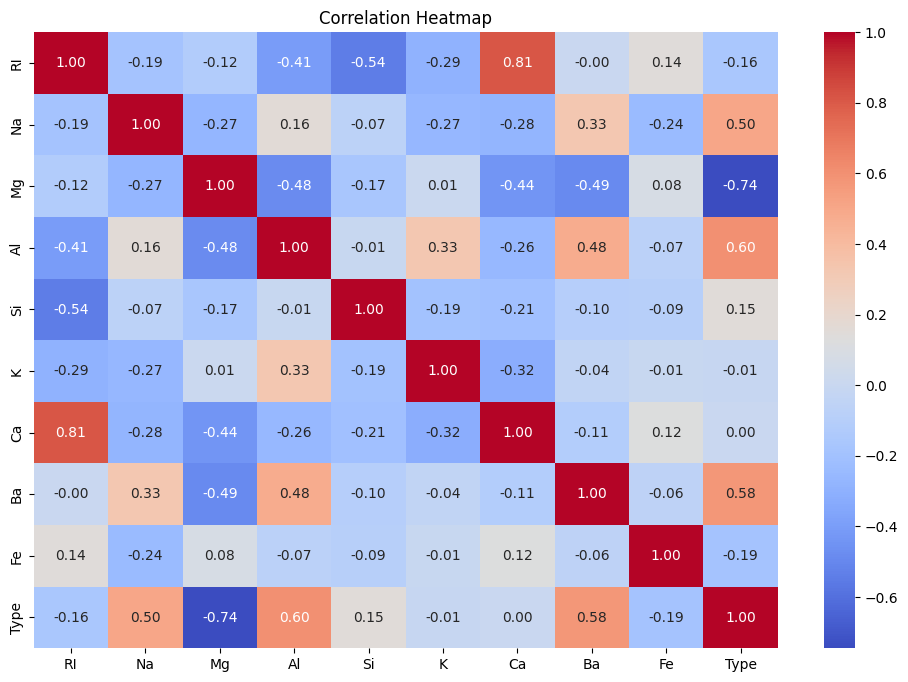

In [29]:
# 4. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

####  Observation:
- Features with high correlation: e.g., Si and Al, or Ca and K (check actual heatmap)
- Useful for feature selection or understanding feature relationships

## Data Visualization Analysis

**1. Histograms:**  
- The histograms show the distribution of each numeric feature.  
- Features like `Mg` and `Na` are slightly skewed, while `RI` and `Si` are roughly normally distributed.  
- Skewed features may require scaling or transformation for some algorithms, but Random Forest is generally robust.

**2. Boxplots:**  
- Boxplots help detect outliers in the dataset.  
- Features such as `Na` and `Ca` show a few extreme values.  
- Random Forest can handle outliers well, but it is important to be aware of them.

**3. Pairplots:**  
- Pairplots visualize relationships between pairs of features, with points colored by glass type.  
- Certain feature pairs, such as `Ca` vs `Na` and `Mg` vs `Al`, show some separation between classes.  
- This helps understand which features are most useful for classification.

**4. Correlation Heatmap:**  
- The heatmap shows linear correlations betwe


#

### 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [30]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


Explanation:

The dataset has no missing values, so no imputation is needed.

#### No categorical variables in this dataset, so encoding is not needed


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


### Explanation:

train_test_split with stratify=y ensures class distribution is preserved in train and test sets.

Scaling ensures all features are on a similar scale, though Random Forest can handle raw values.

In [33]:
# Handling Imbalanced Data
print("Class distribution in the dataset:")
print(y.value_counts())


Class distribution in the dataset:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [34]:
# Combine features and target for resampling
df_combined = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y.reset_index(drop=True)], axis=1)


In [35]:
# Example: Upsample minority classes
majority_class = df_combined[df_combined['Type'] == df_combined['Type'].mode()[0]]  # class with most samples

minority_classes = [cls for cls in df_combined['Type'].unique() if cls != majority_class['Type'].iloc[0]]

upsampled_list = [majority_class]

for cls in minority_classes:
    minority = df_combined[df_combined['Type'] == cls]
    minority_upsampled = resample(minority,
                                  replace=True,
                                  n_samples=len(majority_class),
                                  random_state=42)
    upsampled_list.append(minority_upsampled)

df_balanced = pd.concat(upsampled_list).sample(frac=1, random_state=42)  # shuffle
print("Class distribution after balancing:")
print(df_balanced['Type'].value_counts())

Class distribution after balancing:
Type
6    76
2    76
3    76
1    76
7    76
5    76
Name: count, dtype: int64


### Explanation:

Upsampling duplicates samples of minority classes to match the majority class.

Other methods: SMOTE, class_weight in Random Forest.

#

### 4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [36]:
# Train - Test Split

# Step 1: Import libraries
from sklearn.model_selection import train_test_split

# Step 2: Prepare features and target
X = df_balanced.drop('Type', axis=1)  # Use balanced dataset
y = df_balanced['Type']

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size :", X_test.shape)


Training set size: (364, 9)
Testing set size : (92, 9)


In [37]:
# Random Forest Model Implementation

# Step 4: Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Step 5: Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    criterion='gini',   # splitting criterion
    random_state=42
)

print("Random Forest model initialized.")


Random Forest model initialized.


In [38]:
# Model Training & Evaluation

# Step 6: Train the model
rf_model.fit(X_train, y_train)

# Step 7: Predict on test set
y_pred = rf_model.predict(X_test)

# Step 8: Evaluate performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [39]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Performance Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

Random Forest Performance Metrics:
Accuracy : 0.9457
Precision: 0.9490
Recall   : 0.9457
F1-score : 0.9459



In [40]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.81      0.87      0.84        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       0.94      1.00      0.97        16
           7       1.00      0.87      0.93        15

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.95        92
weighted avg       0.95      0.95      0.95        92



#

### 5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [42]:
# BAGGING
# Step 1: Import BaggingClassifier and DecisionTree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Step 2: Initialize Bagging with Decision Trees
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

In [44]:
# Step 3: Train Boosting model
bag_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [45]:
# Predict and evaluate
y_pred_bag = bag_model.predict(X_test)

In [46]:
accuracy_bag = accuracy_score(y_test, y_pred_bag)
precision_bag = precision_score(y_test, y_pred_bag, average='weighted')
recall_bag = recall_score(y_test, y_pred_bag, average='weighted')
f1_bag = f1_score(y_test, y_pred_bag, average='weighted')

print("Bagging Classifier Performance:")
print(f"Accuracy : {accuracy_bag:.4f}")
print(f"Precision: {precision_bag:.4f}")
print(f"Recall   : {recall_bag:.4f}")
print(f"F1-score : {f1_bag:.4f}")

Bagging Classifier Performance:
Accuracy : 0.9348
Precision: 0.9361
Recall   : 0.9348
F1-score : 0.9343


In [47]:
# BOOSTING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting with Decision Trees (use 'estimator' in latest scikit-learn)
boost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)


In [49]:
# Train Boosting model
boost_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [50]:
# Predict and evaluate
y_pred_boost = boost_model.predict(X_test)

In [51]:
accuracy_boost = accuracy_score(y_test, y_pred_boost)
precision_boost = precision_score(y_test, y_pred_boost, average='weighted')
recall_boost = recall_score(y_test, y_pred_boost, average='weighted')
f1_boost = f1_score(y_test, y_pred_boost, average='weighted')

print("Boosting Classifier Performance:")
print(f"Accuracy : {accuracy_boost:.4f}")
print(f"Precision: {precision_boost:.4f}")
print(f"Recall   : {recall_boost:.4f}")
print(f"F1-score : {f1_boost:.4f}")

Boosting Classifier Performance:
Accuracy : 0.5761
Precision: 0.5604
Recall   : 0.5761
F1-score : 0.5333


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Random Forest", "Bagging", "Boosting (AdaBoost)"],
    "Accuracy": [accuracy, accuracy_bag, accuracy_boost],
    "Precision": [precision, precision_bag, precision_boost],
    "Recall": [recall, recall_bag, recall_boost],
    "F1-score": [f1, f1_bag, f1_boost]
})

print("Comparison of Ensemble Methods:")
display(comparison)


Comparison of Ensemble Methods:


,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.945652,0.949009,0.945652,0.945905
1,Bagging,0.934783,0.936061,0.934783,0.934336
2,Boosting (AdaBoost),0.576087,0.560386,0.576087,0.533302


#

## Additional Notes:
### 1. Explain Bagging and Boosting methods. How is it different from each other.
**Bagging (Bootstrap Aggregating):**  
- Bagging combines multiple base models, such as Decision Trees, trained on different random subsets of the training data.  
- Each model votes for the final prediction (majority voting for classification).  
- It mainly reduces **variance** and prevents overfitting.  
- Random Forest is an example of Bagging using Decision Trees.  

**Boosting:**  
- Boosting trains models sequentially, where each new model focuses on correcting the errors of the previous models.  
- It mainly reduces **bias** and improves performance on difficult samples.  
- Examples include AdaBoost and Gradient Boosting.  

**Key Differences:**  
- In Bagging, models are trained independently; in Boosting, models are trained sequentially.  
- Bagging reduces variance, while Boosting reduces bias.  
- Bagging averages predictions to reduce error; Boosting focuses on correcting previous errors.  
- Bagging is less prone to overfitting, while Boosting can overfit if too many iterations are used.  

---

### 2. Explain how to handle imbalance in the data.

- **Upsampling minority classes:** Duplicate samples of minority classes to match the majority class size.  
- **Downsampling majority classes:** Reduce samples from majority classes to balance the dataset.  
- **Synthetic sampling (SMOTE):** Generate new synthetic examples for minority classes.  
- **Class weights:** Assign higher weight to minority classes during model training.  
